**LAB 5.1**

# **A. Phát hiện trang web lừa đảo bằng kỹ thuật học máy**
***(Phishing Website Detection by Machine Learning Techniques)***

Nhóm 16

21522678 Phạm Trung Tín

21522429 Trần Nguyễn Yến Nhi




# **1. Mục tiêu:**
Website lừa đảo (phishing website) là một tấn công phi kỹ thuật (social engineering) bằng cách bắt trước các URL tin cậy. Mục tiêu bài thực hành sẽ đào tạo mô hình học máy và học sâu trên tập dữ liệu để dự đoán website lừa đảo. Cả 2 URL lừa đảo và lành tính (benign) được trích xuất thuộc tình từ thành phần cơ bản của website thành tập dữ liệu.
Dataset sử dụng trong Lab: https://drive.google.com/drive/folders/1vD0i34RVMFKXdvDmnZmejmTQ-tNm5xcB?usp=sharing

## **2. Tải dữ liệu**
Các tính năng được trích xuất và lưu trữ trong tập tin csv.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/lab4_antt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import ackages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data0 = pd.read_csv(data_dir + '/urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


# **3. Làm quen với dữ liệu**
Dùng Dataframe để xem qua dữ liệu.

In [ ]:
#Check shape
data0.shape

(10000, 18)

In [ ]:
#List features
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
#Information
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

# **4. Trực quan hóa dữ liệu**
Một số biểu đồ hiển thị để tìm các phân phối dữ liệu và cách mỗi liên quan với nhau giữa các đối tượng.

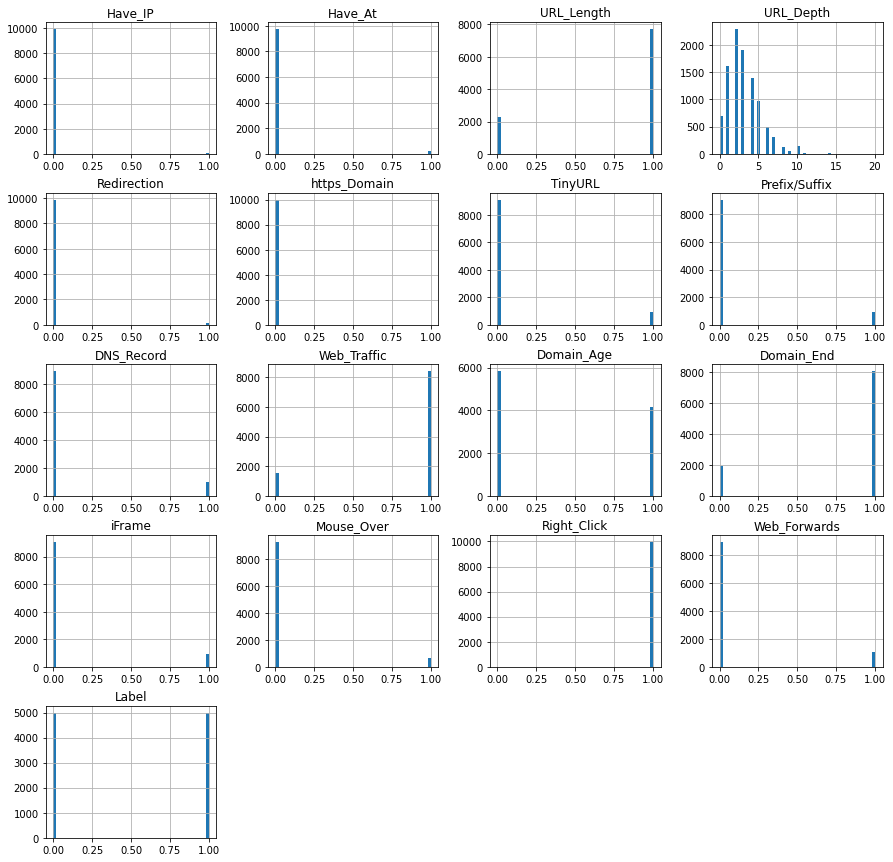

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

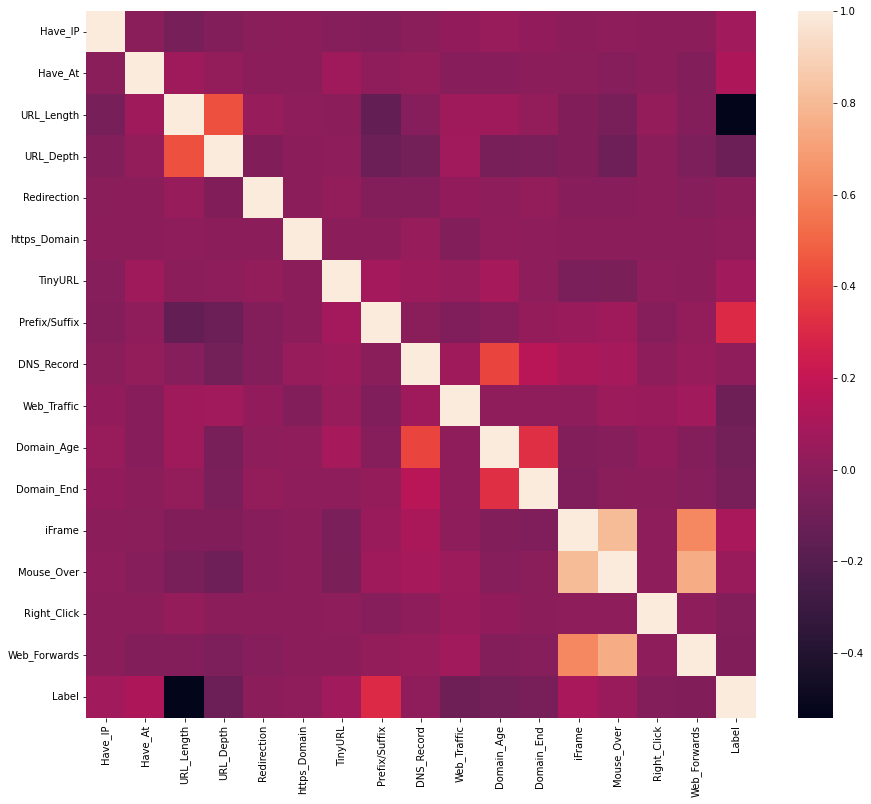

In [ ]:
#Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

# **5. Tiền xử lý dữ liệu & EDA**
Làm sạch dữ liệu bằng cách áp dụng các kỹ thuật tiền xử lý dữ liệu và chuyển đổi dữ liệu để sử dụng nó trong các mô hình.

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


Kết quả thu được ở trên cho thấy rằng hầu hết dữ liệu được tạo từ 0 và 1 ngời trừ cột  'Domain' & 'URL_Depth'. cột Domain hoàn toàn không có ý nghĩa gì để đào tạo mô hình nên loại nó.

In [ ]:
#Drop Domain column
data = data0.drop(['Domain'], axis = 1).copy()

Ta còn lại 16 thuộc tính và 1 cột phân loại. Giá trị tối đa của 'URL_Depth'  là 20. Ta cần chuẩn hoá cột này.

In [ ]:
#check data null
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

Trong tập tin thuộc tính được trích xuất, các thuộc tính được trích xuất của tập url lừa đảo và lành tính không có bất kỳ xáo trộn nào.

In [ ]:
# shuffling the rows
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,1,0,1
1,0,0,0,3,0,0,0,0,0,1,0,1,0,0,1,0,1
2,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0


# **6. Chia dữ liệu**

In [ ]:
#features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
# train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# **7. Đào tạo mô hình học máy**
Dữ liệu phù hợp với việc học có giám sát và hai bài toán nên áp dụng là classification - phân loại và regression - hồi quy.
Ta sẽ có 2 nhãn  phishing (1) và legitimate (0), với các mô hình học giám sát sau:
*  Decision Tree
*  Random Forest
*  Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Creating model results
ML_Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## **7.1 Decision Tree Classifier**

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

***Đánh giá hiệu suất***

In [ ]:
#computing the accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.811
Decision Tree: Accuracy on test Data: 0.822


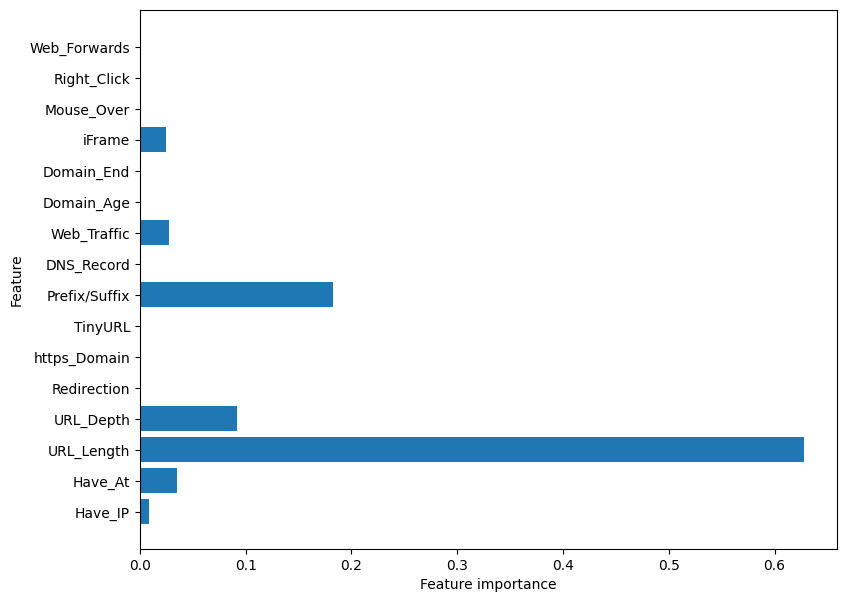

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [ ]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## **7.2 Random Forest Classifier**

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate
forest = RandomForestClassifier(max_depth=5)

# fit
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.818
Random forest: Accuracy on test Data: 0.826


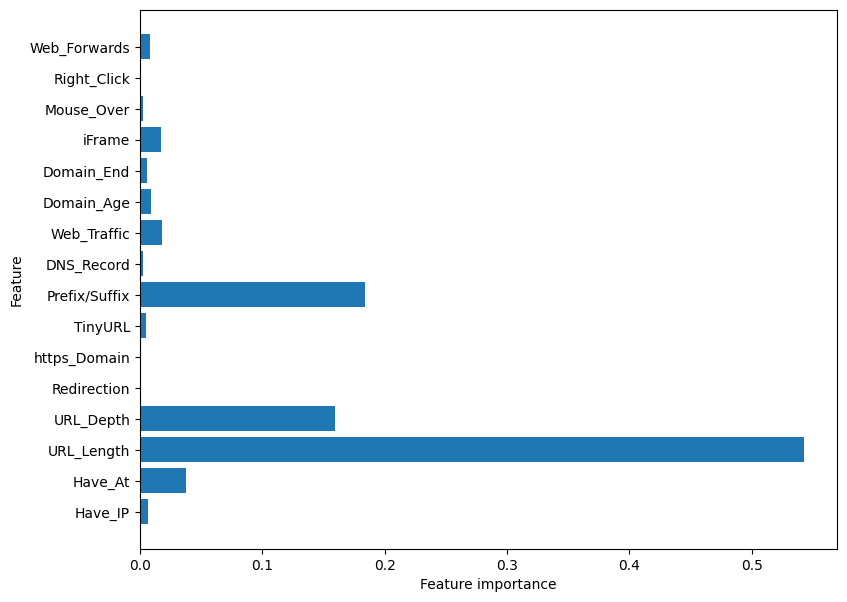

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [ ]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

##**7.3. Multilayer Perceptrons (MLPs) - Học sâu**

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
#predicting
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.862
Multilayer Perceptrons: Accuracy on test Data: 0.867


**Lưu trữ kết quả**

In [ ]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## **7.4. XGBoost Classifier**

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#predicting
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Đánh giá hiệu suất**

In [ ]:
#computing the accuracy
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.866
XGBoost : Accuracy on test Data: 0.865


**Lưu trữ kết quả**

In [ ]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **7.5. Deep Neural Network**
***Bài tập số 1: Hoàn thành huấn luyện mô hình DNN.***

In [ ]:
# Deep Neural Network model
from keras.models import Model
from sklearn.metrics import roc_auc_score
from tensorflow import keras
from keras.layers import Dense, Input, GlobalMaxPooling1D,Bidirectional
# define the network
model = keras.Sequential()
model.add(Dense(32 , input_shape=(16,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
# compile
model.fit(X_train, y_train, epochs = 40)
#predicting
y_test_DNN = model.predict(X_test).round()
y_train_DNN = model.predict(X_train).round()

#computing the accuracy
acc_train_DNN = accuracy_score(y_train,y_train_DNN)
acc_test_DNN = accuracy_score(y_test,y_test_DNN)

print("DNN: Accuracy on training Data: {:.3f}".format(acc_train_DNN))
print("DNN : Accuracy on test Data: {:.3f}".format(acc_test_DNN))

Epoch 1/40
250/250 [==============================] - 3s 8ms/step - loss: 0.4495 - accuracy: 0.7796
Epoch 2/40
250/250 [==============================] - 2s 7ms/step - loss: 0.3936 - accuracy: 0.8109
Epoch 3/40
250/250 [==============================] - 1s 3ms/step - loss: 0.3815 - accuracy: 0.8201
Epoch 4/40
250/250 [==============================] - 1s 3ms/step - loss: 0.3779 - accuracy: 0.8221
Epoch 5/40
250/250 [==============================] - 1s 3ms/step - loss: 0.3668 - accuracy: 0.8300
Epoch 6/40
250/250 [==============================] - 1s 2ms/step - loss: 0.3646 - accuracy: 0.8301
Epoch 7/40
250/250 [==============================] - 1s 2ms/step - loss: 0.3593 - accuracy: 0.8359
Epoch 8/40
250/250 [==============================] - 1s 2ms/step - loss: 0.3588 - accuracy: 0.8378
Epoch 9/40
250/250 [==============================] - 1s 2ms/step - loss: 0.3564 - accuracy: 0.8359
Epoch 10/40
250/250 [==============================] - 1s 4ms/step - loss: 0.3506 - accuracy: 0.8422

In [ ]:
storeResults('DNN', acc_train_DNN, acc_test_DNN)

## **7.6. Support Vector Machines**
***Bài tập số 2: Hoàn thành huấn luyến mô hình SVM.***

In [ ]:
# instantiate
from sklearn.svm import LinearSVC
poly_kernel_svm_clf =LinearSVC(C=0.1)

#fit
poly_kernel_svm_clf.fit(X_train, y_train)
#predicting
y_test_poly_kernel_svm_clf = poly_kernel_svm_clf.predict(X_test)
y_train_poly_kernel_svm_clf = poly_kernel_svm_clf.predict(X_train)
#computing the accuracy
acc_train_poly_kernel_svm_clf = accuracy_score(y_train,y_train_poly_kernel_svm_clf)
acc_test_poly_kernel_svm_clf = accuracy_score(y_test,y_test_poly_kernel_svm_clf)

print("poly_kernel_svm_clf: Accuracy on training Data: {:.3f}".format(acc_train_poly_kernel_svm_clf))
print("poly_kernel_svm_clf : Accuracy on test Data: {:.3f}".format(acc_test_poly_kernel_svm_clf))

poly_kernel_svm_clf: Accuracy on training Data: 0.798
poly_kernel_svm_clf : Accuracy on test Data: 0.805


In [ ]:
storeResults('SVM', acc_train_poly_kernel_svm_clf, acc_test_poly_kernel_svm_clf)

# **8. So sánh các mô hình**

In [ ]:
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.811,0.822
1,Random Forest,0.818,0.826
2,Multilayer Perceptrons,0.862,0.867
3,XGBoost,0.866,0.864
4,DNN,0.855,0.865
5,SVM,0.798,0.806


In [ ]:
#Sort accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,Multilayer Perceptrons,0.862,0.867
4,DNN,0.855,0.865
3,XGBoost,0.866,0.864
1,Random Forest,0.818,0.826
0,Decision Tree,0.811,0.822
5,SVM,0.798,0.806


***Bài tập số 3: Cho biết kết quả so sánh mô hình, sau đó viết code lưu trữ mô hình.***

In [ ]:
import joblib
joblib.dump(poly_kernel_svm_clf, "SVM.pkl")
joblib.dump(xgb, "xgb.pkl")
joblib.dump(mlp, "mlp.pkl")
joblib.dump(tree, "tree.pkl")
joblib.dump(forest, "RandomForestClassifier.pkl")
import os
model_dir = os.path.join(os. getcwd(), "DNN_dense_model")
model.save('DNN_dense_model')

# **9. Trích dẫn**
https://blog.keras.io/building-autoencoders-in-keras.html
https://en.wikipedia.org/wiki/Autoencoder
https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/

**LAB 1.2**

# *B. Trích xuất thuộc tính trang web lừa đảo*
***(Phishing Website Detection Feature Extraction)***

# **1. Thu thập dữ liệu**
Ta cần 2 nhãn hớp pháp - legitimate (0) và lừa đảo - phishing (1).
Việc thu thập các url lừa đảo khá dễ dàng do nguồn mở có tên PhishTank. Dịch vụ này cung cấp một tập hợp các URL lừa đảo ở nhiều định dạng như csv, json, v.v. được cập nhật hàng giờ. Để tải xuống dữ liệu: https://www.phishtank.com/developer_info.php
Đối với các url hợp pháp, nguồn từ trường ĐH New Brunswick có sẵn các dạng benign, spam, phishing, malware & defacement URL  https://www.unb.ca/cic/datasets/url-2016.html. Số lượng URL hợp pháp là 35,300 'Benign_list.csv'

## **1.1. Phishing URLs:**

In [ ]:
import pandas as pd

In [ ]:
#Download phishing URLs
!wget http://data.phishtank.com/data/online-valid.csv

--2023-12-30 15:48:17--  http://data.phishtank.com/data/online-valid.csv
Resolving data.phishtank.com (data.phishtank.com)... 104.17.177.85, 104.16.101.75, 2606:4700::6810:654b, ...
Connecting to data.phishtank.com (data.phishtank.com)|104.17.177.85|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.phishtank.com/data/online-valid.csv [following]
--2023-12-30 15:48:17--  https://data.phishtank.com/data/online-valid.csv
Connecting to data.phishtank.com (data.phishtank.com)|104.17.177.85|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1703951307&Signature=UWSx29tKSxORL70~DhpQVQU0QpunfYGg3WLPgIos7mhORFCJSYpMF3ZWa69cVuy-Sqd1whrMxYjn1C365NivO7rrd8PzFbjvABcCUFu18~yFHuIcXvZQ3Ge7nYotBtlMJHkUbvm81cSI10QrhZJx-Zm~9Tr883NWDBEwOJomefWXrq55KGHiKpTiMU8VFmrtKmA8M05hBPJgceMDtXk8Y8YuI2k9-SzsyDzrdAiH7Ta1eZ7w90VzJsGRcxf1dyIAlr4QgGWGdLsWYrimAD1QxtBkd4RBU-seCnDgD

In [ ]:
#Load CSV
data0 = pd.read_csv("online-valid.csv")
data0.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8407318,https://allegrolokalnie.platnosc-payu247.pl/of...,http://www.phishtank.com/phish_detail.php?phis...,2023-12-30T15:01:15+00:00,yes,2023-12-30T15:04:04+00:00,yes,Allegro
1,8407317,https://sbcglobalnewsupdate.weebly.com/,http://www.phishtank.com/phish_detail.php?phis...,2023-12-30T15:01:02+00:00,yes,2023-12-30T15:04:04+00:00,yes,Other
2,8407315,https://pub-54daabc7ee4a4c83b16a51a1af2963d0.r...,http://www.phishtank.com/phish_detail.php?phis...,2023-12-30T14:57:48+00:00,yes,2023-12-30T15:04:04+00:00,yes,Other
3,8407313,https://at-ts-superb-site.webflow.io/,http://www.phishtank.com/phish_detail.php?phis...,2023-12-30T14:51:45+00:00,yes,2023-12-30T14:57:22+00:00,yes,Other
4,8407312,https://attlogin107784-104185.weeblysite.com/,http://www.phishtank.com/phish_detail.php?phis...,2023-12-30T14:51:20+00:00,yes,2023-12-30T14:57:22+00:00,yes,Other


In [ ]:
data0.shape

(39861, 8)

Chọn ngẫu nhiên 5000 mẫu.

In [ ]:
phishurl = data0.sample(n = 5000, random_state = 12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8388030,https://bipcancelarnet.webcindario.com/inicio....,http://www.phishtank.com/phish_detail.php?phis...,2023-12-10T18:52:41+00:00,yes,2023-12-10T18:53:27+00:00,yes,Other
1,8187021,https://docs.google.com/presentation/d/e/2PACX...,http://www.phishtank.com/phish_detail.php?phis...,2023-06-19T17:31:17+00:00,yes,2023-06-19T17:33:17+00:00,yes,Other
2,8147768,https://ipfs.eth.aragon.network/ipfs/bafybeiev...,http://www.phishtank.com/phish_detail.php?phis...,2023-05-17T03:01:00+00:00,yes,2023-05-17T04:04:26+00:00,yes,Other
3,8271024,https://ipfs.eth.aragon.network/ipfs/bafybeihe...,http://www.phishtank.com/phish_detail.php?phis...,2023-08-24T00:09:54+00:00,yes,2023-08-24T00:52:39+00:00,yes,Other
4,8197407,https://ipfs.eth.aragon.network/ipfs/bafybeigk...,http://www.phishtank.com/phish_detail.php?phis...,2023-06-26T21:50:18+00:00,yes,2023-06-26T22:23:44+00:00,yes,Other


In [ ]:
phishurl.shape

(5000, 8)

## **1.2. Legitimate URLs:**

In [ ]:
#Load legitimate files
data1 = pd.read_csv(data_dir + "/Benign_list.csv")
data1.columns = ['URLs']
data1.head()

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


In [ ]:
#Collec 5,000 Legitimate URLs randomly
legiurl = data1.sample(n = 5000, random_state = 12).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head()

,URLs
0,http://graphicriver.net/search?date=this-month...
1,http://ecnavi.jp/redirect/?url=http://www.cros...
2,https://hubpages.com/signin?explain=follow+Hub...
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...
4,http://icicibank.com/Personal-Banking/offers/o...


In [ ]:
legiurl.shape

(5000, 1)

# **2. Trích xuất thuộc tính**
Các thuộc tính sẽ được trích xuất phân loại thành:
* Address Bar
* Domain
* HTML & Javascript

## **2.1 Thuộc tính Address Bar**
Ta chỉ chọn một số thuộc tính cơ bản sau:
* Domain of URL
* IP Address in URL
* "@" Symbol in URL
* Length of URL
* Depth of URL
* Redirection "//" in URL
* "http/https" in Domain name
* Using URL Shortening Services “TinyURL”
* Prefix or Suffix "-" in Domain

In [12]:
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [13]:
# 1.Domain
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

In [14]:
# 2.Have_IP
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

In [15]:
# 3.Have_At (@)
def haveAtSign(url):
  if "@" in url:
    at = 1
  else:
    at = 0
  return at

In [16]:
# 4.URL_Length
def getLength(url):
  if len(url) < 54:
    length = 0
  else:
    length = 1
  return length

In [17]:
# 5.URL_Depth '/'
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [18]:
# 6.Redirection '//'
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [19]:
# 7. https_Domain
def httpDomain(url):
  domain = urlparse(url).scheme
  if 'https' in domain:
    return 1
  else:
    return 0

In [20]:
# 8. Checking Tiny_URL
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [21]:
# 9.Check Prefix or Suffix "-" in Domain
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

## **2.2 Thuộc tính Domain**
Các thể loại thuộc tính được trích xuất:
* DNS Record
* Website Traffic
* Age of Domain
* End Period of Domain

In [ ]:
!pip install python-whois

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103246 sha256=b26cd6ab8659316fa3df3f0ac284ad109bb84b51d36dba4c8242c174118f8352
  Stored in directory: /root/.cache/pip/wheels/10/f1/87/145023b9a206e2e948be6480c61ef3fd3dbb81ef11b6977782
Successfully built python-whois


In [ ]:
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [ ]:
# 11.DNS_Record
# obtained in the featureExtraction function

In [22]:
#Nếu thứ hạng của doamin <100000, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp).
# 12.Web traffic
def web_traffic(url):
  try:
    #Fill whitespaces  URL if any
    url = urllib.parse.quote(url)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0

In [23]:
#Nếu age of domain > 12 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 13.Survival time of domain (Domain_Age)
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

In [24]:
# Nếu period of domain > 6 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 14.End time of domain (Domain_End)
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

## **2.3 Thuộc tính HTML and JavaScript**
Các tập thuộc tính được trích xuất sau:
* IFrame Redirection
* Status Bar Customization
* Disabling Right Click
* Website Forwarding

In [26]:
import requests

In [25]:
# 15. IFrame
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [27]:
# 16.Check Mouse_Over
def mouseOver(response):
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [28]:
# 17.Check Right_Click
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [29]:
# 18.Check Web_Forwards
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

# **3. Tính toán thuộc tính URLs**
Tạo danh sách và một hàm gọi các hàm khác và lưu trữ tất cả các thuộc tính của URL vào list.

In [30]:
def featureExtraction(url,label):

  features = []
  #Address bar features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))

  #Domain features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))

  # HTML & Javascript features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)

  return features

## **3.1 URL hợp pháp**

In [ ]:
legiurl.shape

In [ ]:
legi_features = []
label = 0

for i in range(0, 5000):
  url = legiurl['URLs'][i]
  legi_features.append(featureExtraction(url,label))

In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head()

In [ ]:
legitimate.to_csv('legitimate.csv', index= False)

## **3.2 URL lừa đảo**

In [ ]:
phishurl.shape

In [ ]:
phish_features = []
label = 1
for i in range(0, 5000):
  url = phishurl['url'][i]
  phish_features.append(featureExtraction(url,label))

In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

In [ ]:
phishing.to_csv('phishing.csv', index= False)

# **4. Datasets**

In [ ]:
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head()

In [ ]:
urldata.tail()

In [ ]:
urldata.shape

In [ ]:
urldata.to_csv('urldata.csv', index=False)

Ta trích xuất được 18 thuộc tính với 10,000 rows trong đó có  5000 phishing  & 5000 legitimate URL

***Bài tập số 3: Dựa vào mục trích xuất dữ liệu Lab 5.2, chọn một tập dataset khác thực hiện lại Lab 5.1***

In [ ]:
!wget "https://data.mendeley.com/public-files/datasets/c2gw7fy2j4/files/575316f4-ee1d-453e-a04f-7b950915b61b/file_downloaded" -O phis_legit.csv

In [ ]:
import pandas as pd

data = pd.read_csv("phis_legit.csv")
data.head()

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data.info

In [8]:
data['status'] = data['status'].replace('phishing',1)
data['status'] = data['status'].replace('legitimate',0)
data = data[['url','status']]
phis = data[data['status'] == 1]
legit = data[data['status'] == 0]
phishurl = phis.sample(n = 50, random_state = 42).copy()
phishurl = phishurl.reset_index(drop=True)

In [ ]:
phish_features = []
label = 1
for i in range(0, 50):
  url = phishurl['url'][i]
  phish_features.append(featureExtraction(url,label))

In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

In [ ]:
legiturl = legit.sample(n = 50, random_state = 42).copy()
legiturl = legiturl.reset_index(drop=True)
legiturl.head()

In [ ]:
legi_features = []
label = 0

for i in range(0, 50):
  url = legiturl['url'][i]
  legi_features.append(featureExtraction(url,label))

In [ ]:
legitimate = pd.DataFrame(legi_features, columns= feature_names)

In [ ]:
data0 = pd.concat([legitimate, phishing]).reset_index(drop=True)

In [ ]:
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

In [ ]:
data0.describe()

In [ ]:
data = data0.drop(['Domain'], axis = 1).copy()

In [ ]:
data.isnull().sum()

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

In [ ]:
#features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape


In [ ]:
# train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

In [ ]:
# Creating model results
ML_Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit
tree.fit(X_train, y_train)
#predicting
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)
#computing the accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate
forest = RandomForestClassifier(max_depth=5)

# fit
forest.fit(X_train, y_train)
#predicting
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit
mlp.fit(X_train, y_train)
#predicting
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)
#computing the accuracy
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit
xgb.fit(X_train, y_train)
#predicting
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)
#computing the accuracy
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [ ]:
# Deep Neural Network model
from keras.models import Model
from sklearn.metrics import roc_auc_score
from tensorflow import keras
from keras.layers import Dense, Input, GlobalMaxPooling1D,Bidirectional
# define the network
model = keras.Sequential()
model.add(Dense(32 , input_shape=(16,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
# compile
model.fit(X_train, y_train, epochs = 40)
#predicting
y_test_DNN = model.predict(X_test).round()
y_train_DNN = model.predict(X_train).round()

#computing the accuracy
acc_train_DNN = accuracy_score(y_train,y_train_DNN)
acc_test_DNN = accuracy_score(y_test,y_test_DNN)

print("DNN: Accuracy on training Data: {:.3f}".format(acc_train_DNN))
print("DNN : Accuracy on test Data: {:.3f}".format(acc_test_DNN))

In [ ]:
storeResults('DNN', acc_train_DNN, acc_test_DNN)

In [ ]:
# instantiate
from sklearn.svm import LinearSVC
poly_kernel_svm_clf =LinearSVC(C=0.1)

#fit
poly_kernel_svm_clf.fit(X_train, y_train)
#predicting
y_test_poly_kernel_svm_clf = poly_kernel_svm_clf.predict(X_test)
y_train_poly_kernel_svm_clf = poly_kernel_svm_clf.predict(X_train)
#computing the accuracy
acc_train_poly_kernel_svm_clf = accuracy_score(y_train,y_train_poly_kernel_svm_clf)
acc_test_poly_kernel_svm_clf = accuracy_score(y_test,y_test_poly_kernel_svm_clf)

print("poly_kernel_svm_clf: Accuracy on training Data: {:.3f}".format(acc_train_poly_kernel_svm_clf))
print("poly_kernel_svm_clf : Accuracy on test Data: {:.3f}".format(acc_test_poly_kernel_svm_clf))

In [ ]:
storeResults('SVM', acc_train_poly_kernel_svm_clf, acc_test_poly_kernel_svm_clf)

In [ ]:
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
#Sort accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)


In [ ]:
import joblib
joblib.dump(poly_kernel_svm_clf, "SVM.pkl")
joblib.dump(xgb, "xgb.pkl")
joblib.dump(mlp, "mlp.pkl")
joblib.dump(tree, "tree.pkl")
joblib.dump(forest, "RandomForestClassifier.pkl")
import os
model_dir = os.path.join(os. getcwd(), "DNN_dense_model")
model.save('DNN_dense_model')

# **5. Trích dẫn**

https://archive.ics.uci.edu/ml/datasets/Phishing+Websites